In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### Checking basic details and preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [7]:
# No null values present

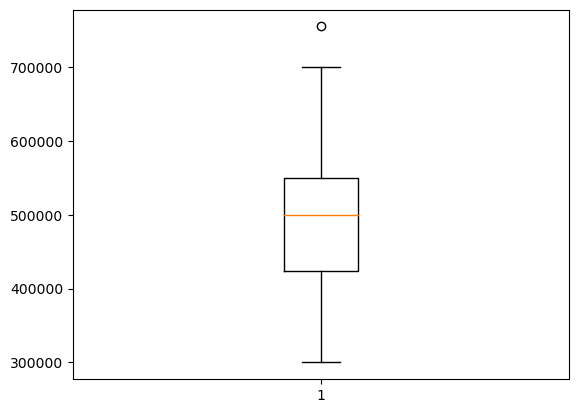

In [8]:
plt.boxplot(data['Price'])
plt.show()

### Find the best linear relationship between year and price.

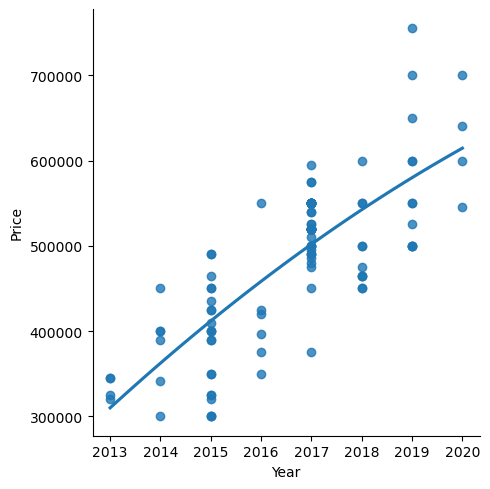

In [9]:
sns.lmplot(x ="Year", y ="Price", data = data,order = 2, ci = None)

In [10]:
corr_matrix= data.corr()

<AxesSubplot:>

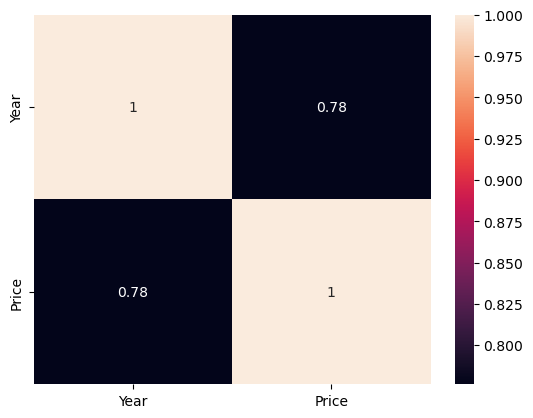

In [11]:
sns.heatmap(corr_matrix,annot=True)

#### Implying price and year is highly correlated,That means as the year went on the price also increased.

### Model building using Linear regression

In [12]:
X = data.drop(['Price'],axis=1)
Y = data['Price']

In [13]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [15]:
from sklearn import linear_model

In [16]:
lr=linear_model.LinearRegression()

In [17]:
model1=lr.fit(X_train,Y_train)

In [18]:
prediction1=model1.predict(X_test)

In [19]:
Y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [20]:
prediction1

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [21]:
print('Mean squared Error :',mean_squared_error(Y_test,prediction1))
print('r squared value :',r2_score(Y_test,prediction1))

Mean squared Error : 4326906256.829671
r squared value : 0.36759313425902185


#### Predict the price for 2022 using linear regression

In [22]:
y_test1=[[2022]]

In [23]:
prediction1=model1.predict(y_test1)

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
prediction1

array([743601.61594504])

### Model building using Lasso regression

In [25]:
X = data.drop(['Price'],axis=1)
Y = data['Price']

In [26]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [27]:
lasso=Lasso(alpha=1)

In [28]:
model2=lasso.fit(X_train,Y_train)

In [29]:
prediction2= model2.predict(X_test)

In [30]:
prediction2

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [31]:
print('Mean squared Error :',mean_squared_error(Y_test,prediction2))
print('r squared value :',r2_score(Y_test,prediction2))

Mean squared Error : 4326859771.015669
r squared value : 0.3675999284778446


#### Predict the price for 2022 using Lasso regression

In [32]:
y_test1=[[2022]]

In [33]:
prediction2=lasso.predict(y_test1)

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [34]:
prediction2

array([743599.37427144])

#### The r2 score in lasso regression is slightly greater than that of linear regression.So it is best to choose lasso regression model.